<a href="https://colab.research.google.com/github/ktanigoo/INFO254/blob/master/Kaggle_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

#get csv from url
df1 = pd.read_csv('black_friday_data_kaggle.csv', error_bad_lines=False)
df1.head()
  

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,-1,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,-1,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,-1,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Feature Engineering

In [0]:
# Transform data to have rows at a product id level

X.head()

,Product_ID,User_ID,Log_Num_Users
0,P00000142,1130,7.029973
1,P00000242,371,5.916202
2,P00000342,238,5.472271
3,P00000442,92,4.521789
4,P00000542,146,4.983607


In [0]:
import numpy as np
df_product = df1.groupby(by='Product_ID', as_index=False).agg({'User_ID': pd.Series.nunique, 'Product_Category_1': lambda x: x.iloc[0]})

df_product['Log_Num_Users'] = np.log(df_product.User_ID)


In [0]:
df_product.head()

,Product_ID,User_ID,Product_Category_1,Log_Num_Users
0,P00000142,1130,-1,7.029973
1,P00000242,371,-1,5.916202
2,P00000342,238,-1,5.472271
3,P00000442,92,-1,4.521789
4,P00000542,146,-1,4.983607


In [0]:
df_product.Product_Category_1.value_counts()

-1     1207
 8      663
 5      652
 1      320
 11     201
 2      105
 6       76
 16      69
 3       66
 4       64
 7       59
 15      33
 14      32
 18      19
 13      19
 12      17
 10      12
 17       8
 9        1
Name: Product_Category_1, dtype: int64

In [0]:
df_train = df_product[df_product.Product_Category_1 != -1]
df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready

# Divide the training data into test and train data to measure accuracy
y = df_train['Product_Category_1']
X = df_train.drop('Product_Category_1', axis=1)


In [0]:
X.head()
X.count()
df_test.count()
#len(df_product)

Product_ID            1207
User_ID               1207
Product_Category_1    1207
Log_Num_Users         1207
dtype: int64

In [0]:
X.head()

,Product_ID,User_ID,Log_Num_Users
1207,P00130242,80,4.382027
1208,P00130342,35,3.555348
1209,P00130442,248,5.513429
1210,P00130542,12,2.484907
1211,P00130642,480,6.173786


# Decision Tree

In [0]:
X_DT = X[['Log_Num_Users', 'User_ID']]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_DT, y, test_size=0.33, random_state=42)


In [0]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=6)
 
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Training data accuracy', float(accuracy_score(y_pred, y_train))*100, '%')


y_pred = clf.predict(X_test)
print('Testing data accuracy', float(accuracy_score(y_pred, y_test))*100, '%')


Training data accuracy 34.48702101359704 %
Testing data accuracy 29.19799498746867 %


In [0]:

df_test.head()

,Product_ID,User_ID,Product_Category_1,Log_Num_Users
1207,P00130242,80,-1,4.382027
1208,P00130342,35,-1,3.555348
1209,P00130442,248,-1,5.513429
1210,P00130542,12,-1,2.484907
1211,P00130642,480,-1,6.173786


In [0]:
y_pred_test = clf.predict(df_test[['Log_Num_Users', 'User_ID']])
np.unique(y_pred_test)

array([ 1,  2,  5,  8, 12])

In [0]:
# write to submission file

df = pd.DataFrame({'Product_ID': df_test['Product_ID'],
                   'Product_Category_1': y_pred_test
                   })
df.to_csv('submission_file.csv', index=False)

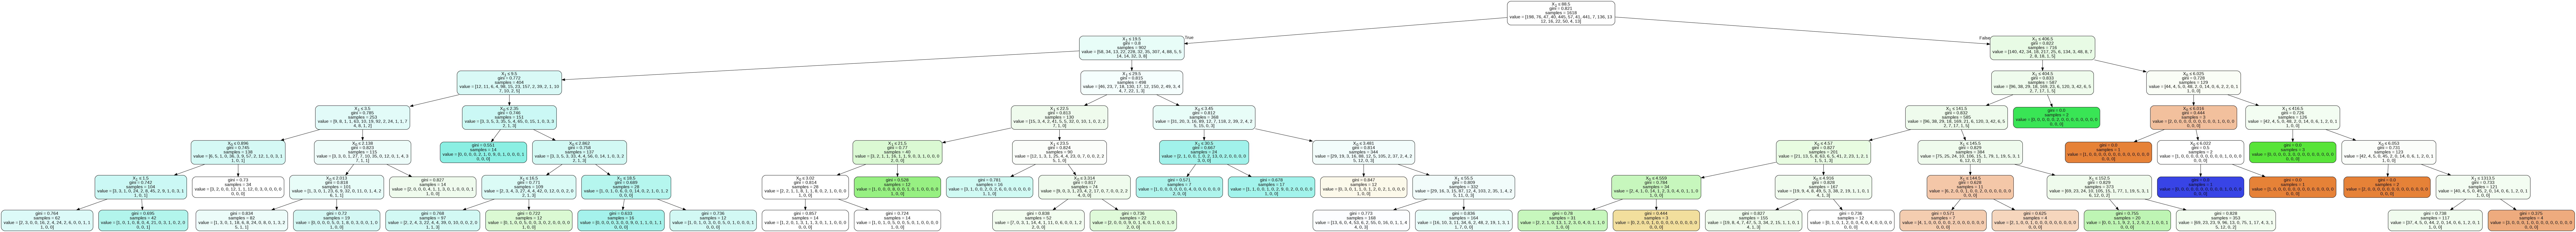

In [0]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz


dotfile = StringIO() 
export_graphviz(clf, out_file=dotfile,
                         filled=True, rounded=True,
                         special_characters=True)
                    
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())